In [1]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=8111932931c6aacb903e16e6a99f1beaf5dfccbc2d66c2684f5e21f97563cf8a
  Stored in directory: c:\users\kk\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [3]:
!kaggle competitions download -c titanic


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|##########| 34.1k/34.1k [00:00<00:00, 2.69MB/s]


In [4]:
import zipfile
with zipfile.ZipFile('./titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import optimizers, losses
from keras.layers import Dense, Dropout, Input

In [12]:
train_df = pd.read_csv('train.csv')
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df = pd.read_csv('test.csv')
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
submission_df = pd.read_csv('gender_submission.csv')
submission_df.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
for column in train_df.columns:
    print(column,len(train_df[column].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


In [61]:
drop_train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
drop_train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [62]:
# one hot encoding
temp = pd.merge(drop_train_df,
               pd.get_dummies(drop_df['Sex']),
               right_index=True, left_index=True)
temp.drop(['Sex'], axis=1, inplace=True)
temp

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,0,3,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,38.0,1,0,71.2833,C85,C,1,0
2,1,3,26.0,0,0,7.9250,NaN,S,1,0
3,1,1,35.0,1,0,53.1000,C123,S,1,0
4,0,3,35.0,0,0,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,S,0,1
887,1,1,19.0,0,0,30.0000,B42,S,1,0
888,0,3,NaN,1,2,23.4500,NaN,S,1,0
889,1,1,26.0,0,0,30.0000,C148,C,0,1


In [63]:
# other way to one hot encoding
temp = drop_train_df.copy()
temp[['male','female']] = drop_train_df.apply(lambda row : pd.Series([1,0]) if row['Sex']=='male' else pd.Series([0,1]), axis=1)
temp.drop(['Sex'], axis=1, inplace=True)
temp

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,male,female
0,0,3,22.0,1,0,7.2500,NaN,S,1,0
1,1,1,38.0,1,0,71.2833,C85,C,0,1
2,1,3,26.0,0,0,7.9250,NaN,S,0,1
3,1,1,35.0,1,0,53.1000,C123,S,0,1
4,0,3,35.0,0,0,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,S,1,0
887,1,1,19.0,0,0,30.0000,B42,S,0,1
888,0,3,NaN,1,2,23.4500,NaN,S,0,1
889,1,1,26.0,0,0,30.0000,C148,C,1,0


In [78]:
# to numerical data
df1 = drop_train_df.copy()
df1['Sex'] = df1['Sex'].astype('category').cat.codes
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,NaN,1,2,23.4500,NaN,S
889,1,1,1,26.0,0,0,30.0000,C148,C


In [79]:
df1['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [80]:
df1['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [81]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [90]:
# to numerical data
df2 = df1.copy()
df2['Embarked'] = df2['Embarked'].astype('category').cat.codes
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,2
1,1,1,0,38.0,1,0,71.2833,C85,0
2,1,3,0,26.0,0,0,7.9250,NaN,2
3,1,1,0,35.0,1,0,53.1000,C123,2
4,0,3,1,35.0,0,0,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,2
887,1,1,0,19.0,0,0,30.0000,B42,2
888,0,3,0,NaN,1,2,23.4500,NaN,2
889,1,1,1,26.0,0,0,30.0000,C148,0


In [91]:
df3 = df2.copy()
df3['Cabin'] = df3['Cabin'].str[:1]
df3['Cabin'] = df3['Cabin'].astype('category').cat.codes
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,-1,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,-1,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,-1,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,-1,2
887,1,1,0,19.0,0,0,30.0000,1,2
888,0,3,0,NaN,1,2,23.4500,-1,2
889,1,1,1,26.0,0,0,30.0000,2,0


In [144]:
df4 = df3.dropna()
df4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,-1,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,-1,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,-1,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,-1,1
886,0,2,1,27.0,0,0,13.0000,-1,2
887,1,1,0,19.0,0,0,30.0000,1,2
889,1,1,1,26.0,0,0,30.0000,2,0


In [145]:
train_X = df4.drop('Survived', axis=1)
train_Y = df4['Survived']

In [157]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   Sex       714 non-null    int8   
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
 6   Cabin     714 non-null    int8   
 7   Embarked  714 non-null    int8   
dtypes: float64(2), int64(3), int8(3)
memory usage: 35.6 KB


In [197]:
def get_model():
    inputs = Input(shape=(train_X.shape[1]))
    
    x = Dense(16, activation='relu')(inputs)
    x = Dense(8, activation='relu')(x)
    x = Dense(4, activation='relu')(x)
    outputs= Dense(1, activation='sigmoid')(x)
    
    return keras.Model(inputs=inputs, outputs=outputs)

In [198]:
model = get_model()
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_45 (Dense)            (None, 128)               1152      
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [199]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [200]:
epochs = 100
validation_split = 0.05

In [201]:
history = model.fit(train_X, train_Y, epochs=epochs, validation_split=validation_split)

Epoch 1/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7246 - accuracy: 0.6696 - val_loss: 0.5865 - val_accuracy: 0.6944
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6696 - val_loss: 0.6980 - val_accuracy: 0.5556
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.6711 - val_loss: 0.5925 - val_accuracy: 0.7222
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6770 - val_loss: 0.5499 - val_accuracy: 0.6944
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.6799 - val_loss: 0.5764 - val_accuracy: 0.6389
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7212 - val_loss: 0.6399 - val_accuracy: 0.6389
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6740 - val_loss: 0.5031 - val_accuracy: 0.7500
Epoch 8/100
2

Epoch 59/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7920 - val_loss: 0.3518 - val_accuracy: 0.8333
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8201 - val_loss: 0.3876 - val_accuracy: 0.8056
Epoch 61/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.7935 - val_loss: 0.3764 - val_accuracy: 0.8611
Epoch 62/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7788 - val_loss: 0.4060 - val_accuracy: 0.8056
Epoch 63/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.7906 - val_loss: 0.3831 - val_accuracy: 0.8056
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8112 - val_loss: 0.3566 - val_accuracy: 0.8056
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8053 - val_loss: 0.3694 - val_accuracy: 0.8056
Epoch 

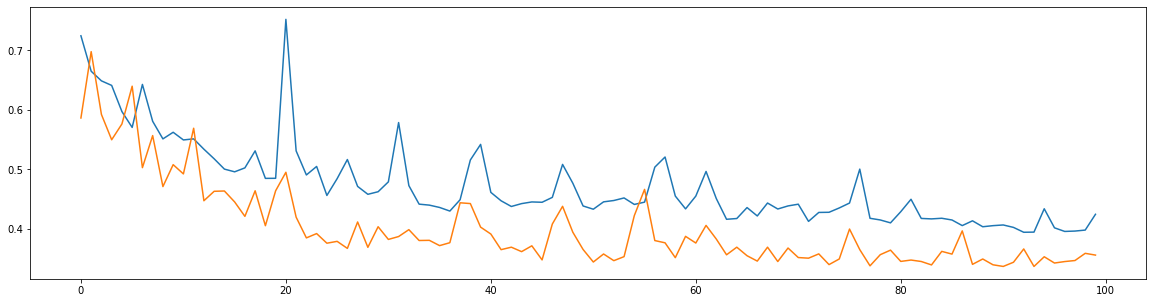

In [202]:
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

In [216]:
def get_answer(pred):
    return np.where(pred>0.5, 1, 0).squeeze()

answer_train = get_answer(pred)

In [229]:
def compare_test(answer, y):
    compare = (answer==y)
    print(compare.value_counts()[True] / len(compare))
compare_test(answer_train,train_Y)

0.8053221288515406


In [222]:
tdf = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
tdf['Sex'] = tdf['Sex'].astype('category').cat.codes
tdf['Embarked'] = tdf['Embarked'].astype('category').cat.codes
tdf['Cabin'] = tdf['Cabin'].str[:1]
tdf['Cabin'] = tdf['Cabin'].astype('category').cat.codes
tdf = tdf.fillna(0)
tdf

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,-1,1
1,3,0,47.0,1,0,7.0000,-1,2
2,2,1,62.0,0,0,9.6875,-1,1
3,3,1,27.0,0,0,8.6625,-1,2
4,3,0,22.0,1,1,12.2875,-1,2
...,...,...,...,...,...,...,...,...
413,3,1,0.0,0,0,8.0500,-1,2
414,1,0,39.0,0,0,108.9000,2,0
415,3,1,38.5,0,0,7.2500,-1,2
416,3,1,0.0,0,0,8.0500,-1,2


In [231]:
test_pred = model.predict(tdf)
answer_test = get_answer(test_pred)

In [240]:
submission_df['Survived'] = answer_test

In [244]:
submission_df.to_csv('submission.csv', index=False)

In [245]:
!kaggle competitions submit -c titanic -f submission.csv -m "First test"

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 24.2kB/s]
100%|##########| 3.18k/3.18k [00:03<00:00, 1.04kB/s]
